In [251]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import seaborn as sns #for visualisation
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn/Churn.csv


In [252]:
import warnings
warnings.filterwarnings('ignore')

In [253]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

telecom-churn



### Importing the data

In [254]:
df=pd.read_csv("../input/telecom-churn/Churn.csv")

###                                    Understanding the data

In [255]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [256]:
print ("\nFeatures : \n" ,df.columns.tolist())  #listing all the features


Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [257]:
df.describe() 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


The description didn't come out to be of much use because most of the columns are non numeric.
However for tenure and monthly charges median value(50%) may be useful in case of missing values.

##### Calculating the columnwise percentage of null values

In [258]:
Null_val = [(c, df[c].isna().mean()*100) for c in df]
Null_val = pd.DataFrame(Null_val, columns=["column_name", "percentage"])

In [259]:
Null_val

,column_name,percentage
0,customerID,0.0
1,gender,0.0
2,SeniorCitizen,0.0
3,Partner,0.0
4,Dependents,0.0
5,tenure,0.0
6,PhoneService,0.0
7,MultipleLines,0.0
8,InternetService,0.0
9,OnlineSecurity,0.0


We observe that there are no NUll values in any column. So we will simply proceed

In [260]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Manipulation (Part 1)

We can see that most of the columns have dtype as "Objects". So they needed to be mapped with a numeric values.

It is to be observed that there are 21 columns and 7042 rows. TotalCharges contains numeric values but here the o/p comes to be object, we need to change that too.


In [261]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')   #changing to numeric

In [262]:
print ("\nUnique values for each column:\n",df.nunique())


Unique values for each column:
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


In the output above, it is to be noted that for different columns there exists a set of unique values.
It is easy to interpret looking at customerID column that each value must be unique and hence there are 7043 values(same as the total number of rows) and for gender(here considering binary only) there exists 2 unique values; either male or female. And so on

In [263]:
df.drop(["customerID"],axis=1,inplace = True) #dropping CustomerID column because it has got nothing to do with analysis of Churn

In [264]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


CHANGING NON NUMERIC COLUMNS TO NUMERIC


In [265]:
df.gender = [1 if each == "Male" else 0 for each in df.gender] #mapping male to 1 and female to 0

In [266]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


CHANGING NON NUMERIC COLUMNS TO NUMERIC

In [267]:
df.gender[df.gender == 'male'] = 1
df.gender[df.gender == 'female'] = 0

#mapping male to 1 and female to 0


We realise that Columns Partner,Dependents, PhoneService,MultipleLines, OnlineSecurity,OnlineBackup,DeviceProtection, Techsupport, StreamingTV, StreamingMOvies,PaperlessBilling and Churn have a same set of unique values(i,e., "yes" or "no" plus one other) so we can map them to 0/1/-1 together

In [268]:
change_to_num = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for x in change_to_num:
    df[x] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df[x]]
    
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


Columns such as InternetService, contract and payement mode are useful in visualisation as mapped values of them to numerals would be confusing to see on graphs
So they'll be mapped after some visualisation

### Data Visualization

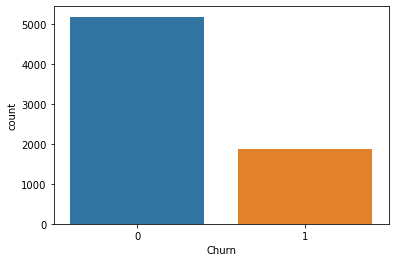

In [269]:

sns.countplot(x="Churn",data=df) #Visualising the distribution of Churn values


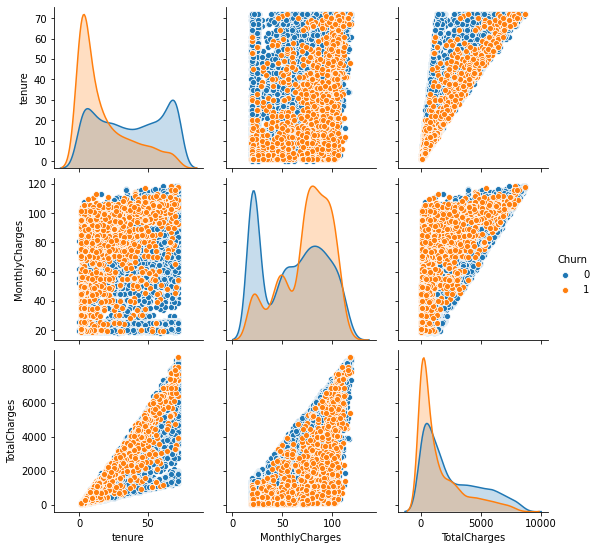

In [270]:
sns.pairplot(df,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn") 
#plotting the three numeric features with hue as "Churn" 
#Hue is a Variable in data to map plot aspects to different colors.


Observations from the above Plots:
1. Tenure is indirectly proportional to Churn
2. Monthly charges are directly proportional to churn

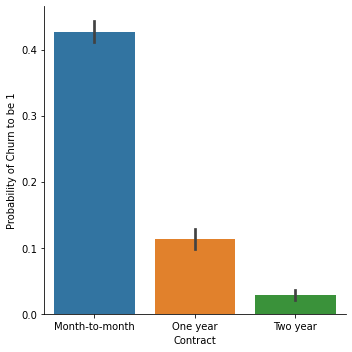

In [271]:
v=sns.catplot(x="Contract", y="Churn", data=df,kind="bar")
v.set_ylabels("Probability of Churn to be 1")
# All types of contract vs Churning probability

OBSERVATIONS:
1. Customers are more likely to stop using service when the contract is month to month
2. Least when a two year contract is made

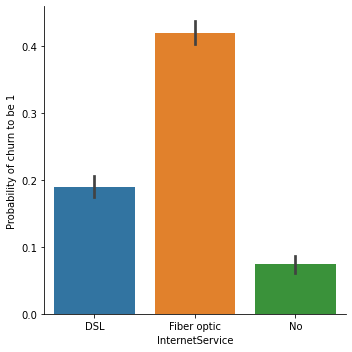

In [272]:
u=sns.catplot(x="InternetService", y="Churn", data=df,kind="bar")
u.set_ylabels("Probability of churn to be 1")
#All types of IS vs CHurn probability

OBSERVATIONS:
1. Maximum probability of losing a customer is when they are using Fiber optic IS
2. Lowest is when they're using none

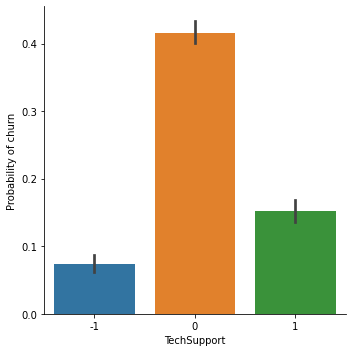

In [273]:
u=sns.catplot(x="TechSupport", y="Churn", data=df,kind="bar")
u.set_ylabels("Probability of churn")

Observation: In case of no tech support, customers have high probability to churn

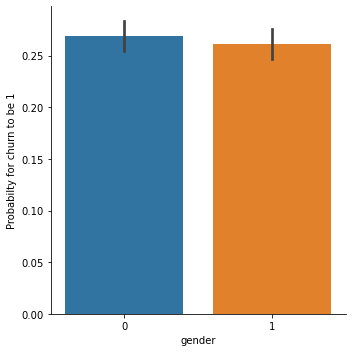

In [274]:
u=sns.catplot(x="gender", y="Churn", data=df,kind="bar")
u.set_ylabels("Probabilty for churn to be 1")

Observation: Gender doesn't play a significant role in analysing whether a customer would churn

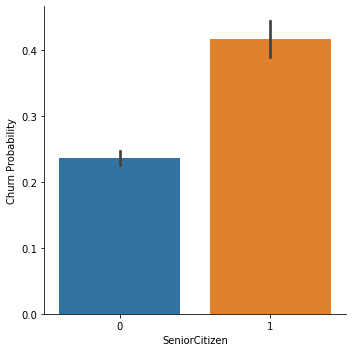

In [275]:
u=sns.catplot(x="SeniorCitizen", y="Churn", data=df,kind="bar")
u.set_ylabels("Churn Probability")

Observation: Younger people are likely to turn into Churn

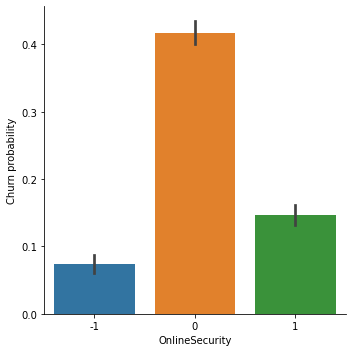

In [276]:
u=sns.catplot(x="OnlineSecurity", y="Churn", data=df,kind="bar")
u.set_ylabels("Churn probability")

Observation: ONline security is directly proportional to churn probability

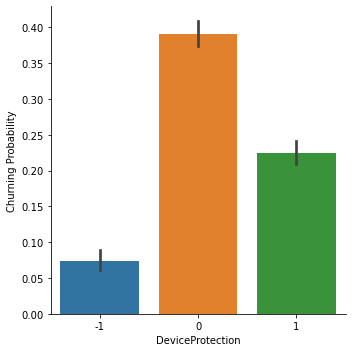

In [277]:
u=sns.catplot(x="DeviceProtection", y="Churn", data=df,kind="bar")
u.set_ylabels("Churning Probability")

Observation: Less device protection may lead to more churning

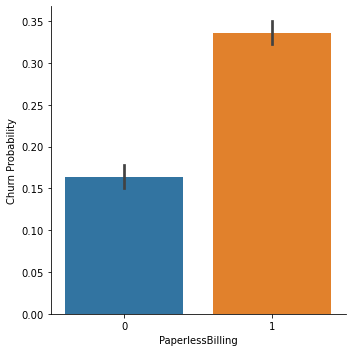

In [278]:
u=sns.catplot(x="PaperlessBilling", y="Churn", data=df,kind="bar")
u.set_ylabels("Churn Probability")

#### Conclusion: The above charts helped in analysing how these features affect Pobability of Churning.
Gender Feature had little impact as women were very less likely to churn


### Data Manipulation (part 2)

In [279]:
#Now we will map the remaining columns (InternetService, Contract, PaymentMethod)

In [280]:
df = pd.get_dummies(data=df)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [281]:
p=df.corr() #Finding the correlation between the columns so that I can remove one of two highly correlated column 
#Usually the values ranging from +/-0.5 to +/-1 are said to be highly correlated, so we will look for it

In [282]:
p

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.009451,-0.014418,-0.012230,-0.004720,...,0.006568,-0.011286,0.006026,-0.003386,0.008026,-0.003695,-0.016024,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.113791,0.081878,0.144828,0.140298,...,-0.108322,0.255338,-0.182742,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.117307,0.091303,0.090753,0.098664,...,-0.000851,0.000304,0.000615,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.019657,-0.029721,-0.062775,-0.069078,...,0.052010,-0.165818,0.139812,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.258958,0.232373,0.253743,0.253999,...,0.013274,0.019720,-0.039062,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.675070,-0.159989,-0.129770,-0.142012,...,-0.452425,0.289999,0.172209,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
MultipleLines,-0.009451,0.113791,0.117307,-0.019657,0.258958,0.675070,1.000000,0.069085,0.130619,0.124502,...,-0.361806,0.414749,-0.082560,-0.068119,-0.004199,0.083266,0.061513,0.042590,0.065663,-0.176117
OnlineSecurity,-0.014418,0.081878,0.091303,-0.029721,0.232373,-0.159989,0.069085,1.000000,0.705166,0.701690,...,0.427891,0.252145,-0.797084,-0.030419,0.041979,-0.004539,0.062184,0.073520,0.094304,-0.239277
OnlineBackup,-0.012230,0.144828,0.090753,-0.062775,0.253743,-0.129770,0.130619,0.705166,1.000000,0.711335,...,0.314037,0.366555,-0.803663,0.016304,0.032695,-0.050078,0.057192,0.057873,0.158719,-0.291444
DeviceProtection,-0.004720,0.140298,0.098664,-0.069078,0.253999,-0.142012,0.124502,0.701690,0.711335,1.000000,...,0.306717,0.373425,-0.803500,-0.023199,0.044766,-0.015592,0.054689,0.071243,0.156932,-0.300069


since there are so many values, we will sort them to check 

In [283]:
p['Churn'].sort_values() 

tenure                                    -0.352229
Contract_Two year                         -0.302253
InternetService_No                        -0.227890
TotalCharges                              -0.199484
Contract_One year                         -0.177820
Dependents                                -0.164221
Partner                                   -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
gender                                    -0.008612
PhoneService                               0.011942
OnlineSecurity                             0.023309
TechSupport                                0.027037
MultipleLines                              0.036310
OnlineBackup                               0.074205
DeviceProtection                           0.084654
SeniorCitizen                              0.150889
StreamingMov

In [284]:
#No value is highly correlated, so we are good to go

In [285]:
df = df.reset_index()

In [286]:
y=df.Churn.values #storing Churn(which is to be predicted) in variable Y

In [287]:
df1=df.drop(["Churn"],axis=1) #dropping Churn column, so that we can be left with rest of the features

In [288]:
x = (df1-np.min(df1))/(np.max(df1)-np.min(df1)).values

The steps below were performed to avoid an error during implementation of models
"Input contains NaN, infinity or a value too large for dtype('float32')"


In [289]:
pd.isnull(x).sum() > 0  #finding the column where lies any null value

index                                      False
gender                                     False
SeniorCitizen                              False
Partner                                    False
Dependents                                 False
tenure                                     False
PhoneService                               False
MultipleLines                              False
OnlineSecurity                             False
OnlineBackup                               False
DeviceProtection                           False
TechSupport                                False
StreamingTV                                False
StreamingMovies                            False
PaperlessBilling                           False
MonthlyCharges                             False
TotalCharges                                True
InternetService_DSL                        False
InternetService_Fiber optic                False
InternetService_No                         False
Contract_Month-to-mo

In [290]:
x=x.fillna(x.mean()) #replacing the null value with mean

In [291]:
np.any(np.isnan(x)) #checking whethetr a null value still exists in the dataframe

False

In [292]:
x = x[np.isfinite(x).all(1)]  #Only keeping finite values

In [293]:
np.all(np.isfinite(x)) #Checking whether all values are finite

True

In [294]:
print(x.astype(np.float32)) #to avoid any dtype error, finding the value that exceeds the bounds of a float 32 dtype

         index  gender  SeniorCitizen  Partner  Dependents    tenure  \
0     0.000000     0.0            0.0      1.0         0.0  0.013889   
1     0.000142     1.0            0.0      0.0         0.0  0.472222   
2     0.000284     1.0            0.0      0.0         0.0  0.027778   
3     0.000426     1.0            0.0      0.0         0.0  0.625000   
4     0.000568     0.0            0.0      0.0         0.0  0.027778   
...        ...     ...            ...      ...         ...       ...   
7038  0.999432     1.0            0.0      1.0         1.0  0.333333   
7039  0.999574     0.0            0.0      1.0         1.0  1.000000   
7040  0.999716     0.0            0.0      1.0         1.0  0.152778   
7041  0.999858     1.0            1.0      1.0         0.0  0.055556   
7042  1.000000     1.0            0.0      0.0         0.0  0.916667   

      PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  ...  \
0              0.0            0.0             0.5           1.0

In [295]:
X = np.nan_to_num(x.astype(np.float32)) #bringing value in the bound of float 32 dtype
print(X)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [1.4200511e-04 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [2.8401022e-04 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 ...
 [9.9971598e-01 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [9.9985802e-01 1.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


Splitting into train and test dataframes

In [296]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state =1) 
#I've split the data in the ratio 80:20

### Implementing Machine Learning Models

In [297]:
from sklearn.tree import DecisionTreeClassifier         #Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree's accuracy:",accuracy_dt)


Decision Tree's accuracy: 0.7359829666430092


In [298]:
from sklearn.svm import SVC                             #SVM
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
accuracy_svc = svc_model.score(x_test,y_test)
print("Accuracy using SVM :",accuracy_svc)

Accuracy using SVM : 0.8076650106458482


In [299]:
from sklearn.naive_bayes import GaussianNB              #Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
accuracy_nb = nb_model.score(x_test,y_test)
print("Accuracy using Naive Bayes :",accuracy_nb)

Accuracy using Naive Bayes : 0.730305180979418


In [300]:
from sklearn.linear_model import LogisticRegression    #Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print(" Accuracy using Logistic Regression is:",accuracy_lr)

 Accuracy using Logistic Regression is: 0.8133427963094393


In [301]:
from sklearn.neighbors import KNeighborsClassifier    #K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
print("KNN accuracy when k=3:",knn.score(x_test,y_test))

KNN accuracy when k=3: 0.7601135557132718


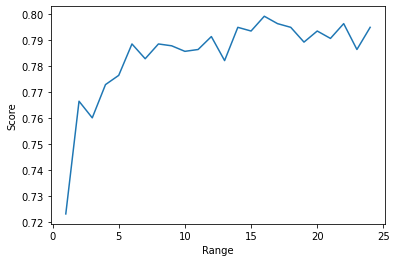

In [302]:
arr1 = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    arr1.append(knn_loop.score(x_test,y_test))
    
plt.plot(range(1,25),arr1)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()


In [303]:
#KNN gives highest accuracy at k=16

In [304]:
knn_model = KNeighborsClassifier(n_neighbors = 16) #at k=16
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy when K=16:",accuracy_knn)

KNN accuracy when K=16: 0.7991483321504613


In [305]:
from sklearn.ensemble import RandomForestClassifier     #Random Forest
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 7 trees is:",rf_model_initial.score(x_test,y_test))


Random Forest accuracy for 7 trees is: 0.7821149751596878


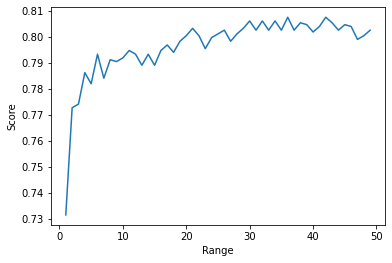

In [306]:
arr = []   #plotting a graph to find best value of K that would give us maximum accuracy
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1)
    rf_loop.fit(x_train,y_train)
    arr.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,50),arr)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [307]:
#Accuracy of RF is highest at 35 and 42

In [308]:
rf_model = RandomForestClassifier(n_estimators = 35, random_state = 1) 
rf_model.fit(x_train,y_train)
accuracy_rf = rf_model.score(x_test,y_test)
print("Random Forest accuracy for 35 trees is:",accuracy_rf)


Random Forest accuracy for 35 trees is: 0.8026969481902059


### Model Evaluation

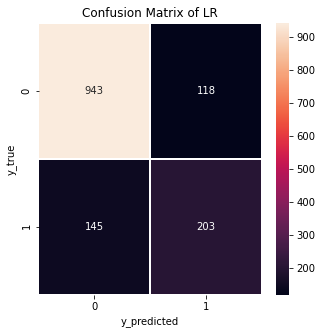

In [309]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
cm_lr = confusion_matrix(y_test,lr_model.predict(x_test)) #for Logistic Regression
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "blue", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of LR")
plt.show()


In [310]:
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)


In [311]:
print_scores("Logistic Regression;",y_test, lr_model.predict(x_test))
print_scores("SVC;",y_test, svc_model.predict(x_test))
print_scores("KNN;",y_test, knn_model.predict(x_test))
print_scores("Naive Bayes;",y_test, nb_model.predict(x_test))
print_scores("Decision Tree;",y_test, dt_model.predict(x_test))
print_scores("Random Forest;",y_test, rf_model.predict(x_test))

Logistic Regression;
accuracy:  0.8133427963094393
precision:  0.632398753894081
recall:  0.5833333333333334
f1_score:  0.810748750113004
SVC;
accuracy:  0.8076650106458482
precision:  0.6199376947040498
recall:  0.5718390804597702
f1_score:  0.8049920581012321
KNN;
accuracy:  0.7991483321504613
precision:  0.6051779935275081
recall:  0.5373563218390804
f1_score:  0.7949993864253994
Naive Bayes;
accuracy:  0.730305180979418
precision:  0.47435897435897434
recall:  0.8505747126436781
f1_score:  0.7484338183132321
Decision Tree;
accuracy:  0.7359829666430092
precision:  0.47073170731707314
recall:  0.5545977011494253
f1_score:  0.7428074251697626
Random Forest;
accuracy:  0.8026969481902059
precision:  0.6086956521739131
recall:  0.5632183908045977
f1_score:  0.8000627860140243


In [312]:
report = classification_report(y_test, lr_model.predict(x_test))  #Report of best performing LR model
print(report)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.63      0.58      0.61       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409



### Final Conclusions

Tenure is inversely proportional to Churn

Monthly charges is directly proportional to Churn

The RF model performed best when number of trees=35/42

The KNN model performed the best when k=16

Logistic Regression model gave highest accuracy

Decision Tree Performed the worst





##### Some steps to avoid Churn:
1. Engage with customers
2. Proving offers
3. Analysis of risk
4. Providing genuine and better service
5. Customer retention is more important than customer acquisition.